# Visualizations
This notebook contains some code snippets to generate plots from CSV files for 3DGS results from TensorBoard etc.

In [1]:
import csv
from pathlib import Path

from PIL import Image
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300

## Image stiching

In [ ]:
# Boilerplate for generating nice plots
def stitch_images_in_columns(image_tuples, add_spaces):
    """
    Stitch a series of PIL images into a single image, arranging them in columns.

    This function takes a list of tuples, where each tuple contains PIL Image objects.

    Parameters:
    - image_tuples (list of tuples): A list where each tuple contains PIL Image objects.
      All tuples must have the same length. The images in position i of each tuple are
      stitched together in column i. For example, [(img1, img2), (img3, img4)] will
      stitch img1 and img3 in the first column, and img2 and img4 in the second column.
    - add_spaces (bool): Whether to add white borders between every image in the stitched image.

    Returns:
    - PIL.Image: A new PIL Image object containing the stitched images.

    Example:
    >>> from PIL import Image
    >>> img1 = Image.open('path/to/img1.jpg')
    >>> img2 = Image.open('path/to/img2.jpg')
    >>> img3 = Image.open('path/to/img3.jpg')
    >>> img4 = Image.open('path/to/img4.jpg')
    >>> combined_image = stitch_images_in_columns([(img1, img2), (img3, img4)], add_spaces=True)
    >>> combined_image.show()
    """
    # Determine the total width and maximum height for the new image
    total_width = 0
    max_height_per_column = [0] * len(image_tuples[0])  # Assuming all tuples have the same length

    # Calculate total width and max height per column
    for images in image_tuples:
        for i, img in enumerate(images):
            total_width += img.width if i == 0 else 0  # Add width only for the first column
            max_height_per_column[i] = max(max_height_per_column[i], img.height)

    total_height = sum(max_height_per_column)  # Total height is the sum of max heights of each column

    # Create a new image with the calculated dimensions
    new_img = Image.new('RGB', (total_width, total_height))

    # Paste images into the new image
    y_offset = 0
    for column_index in range(len(image_tuples[0])):
        x_offset = 0  # Reset x_offset for each column

        for images in image_tuples:
            if add_spaces:
                # Create a new image with white border
                img_with_space = Image.new('RGB', (images[column_index].width + 10, images[column_index].height + 10), (255, 255, 255))
                img_with_space.paste(images[column_index], (5, 5))  # Paste the original image into the new image with space
                new_img.paste(img_with_space, (x_offset, y_offset))
                x_offset += img_with_space.width  # Increment x_offset by the width of the current image with space
            else:
                new_img.paste(images[column_index], (x_offset, y_offset))
                x_offset += images[column_index].width  # Increment x_offset by the width of the current image

        y_offset += max_height_per_column[column_index]  # Increment y_offset by the height of the current column

    return new_img

def save_and_caption(image_tuples, captions, output_path="", col_captions = None, add_spaces = False, caption_disp = 0,  col_caption_disp = 0):
    # First, stitch the images in columns using the previously defined function
    combined_image = stitch_images_in_columns(image_tuples, add_spaces)

    # Convert the PIL image to a NumPy array for matplotlib
    combined_image_np = np.array(combined_image)

    # Create a matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(10, 8), dpi=900)
    ax.imshow(combined_image_np)
    ax.axis('off')  # Hide the axis

    # Add captions for each row
    total_height = combined_image.height
    num_rows = len(image_tuples[0])
    row_height = total_height / num_rows
    fontdict = {'fontname': 'Times New Roman'}

    for i, caption in enumerate(captions):
        ax.text(-220 + caption_disp,i * row_height + row_height / 2, caption, ha='center', va='center', fontdict=fontdict)

    # Optionally caption the columns too
    if col_captions is not None:
        total_width = combined_image.width
        num_cols = len(image_tuples)
        col_width = total_width / num_cols

        for i, col_caption in enumerate(col_captions):
            ax.text(i * col_width + col_width / 2, -80 + col_caption_disp, col_caption, ha='center', va='center', fontdict=fontdict)

    # Save the figure
    if output_path != "":
        plt.savefig(output_path, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free memory
    else:
        plt.show()

In [ ]:
# KITTI360 0 mini recon pics
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/reconstruction_pics/kitti360_0_mini")

first_col = (
    image_dir / "1_gt.png",
    image_dir / "1_colmap.png",
    image_dir / "1_mono.png",
    image_dir / "1_rgbd.png",
)

second_col = (
    image_dir / "2_gt.png",
    image_dir / "2_colmap.png",
    image_dir / "2_mono.png",
    image_dir / "2_rgbd.png",
)

third_col = (
    image_dir / "3_gt.png",
    image_dir / "3_colmap.png",
    image_dir / "3_mono.png",
    image_dir / "3_rgbd.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])
third_col = tuple([Image.open(p) for p in third_col])

captions = ["GT", "COLMAP", "Mono", "RGB-D"]
col_captions = ["Street", "Trees", "Garage"]

save_and_caption([first_col, second_col, third_col], captions, "", col_captions=col_captions, add_spaces=True)

In [ ]:
# KITTI360 0 mini recon inconsistency pics
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/reconstruction_pics/kitti360_0_mini")

gt_col = (Image.open(image_dir / "colmap_inconsistency_gt.png"),) # mind the comma at the end, makes it a tuple
colmap_col = (Image.open(image_dir / "colmap_inconsistency.png"),)

captions = ["GT", "COLMAP"]
save_and_caption([gt_col, colmap_col], "", "", col_captions=captions, add_spaces=True)


In [ ]:
# moving obj removal frames 1
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/moving_obj_removal_pics")

first_col = (
    image_dir / "mov_frame665.png",
    image_dir / "mov_frame666.png",
    image_dir / "mov_frame667.png",
)
second_col = (
    image_dir / "mov_mask_frame665.png",
    image_dir / "mov_mask_frame666.png",
    image_dir / "mov_mask_frame667.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])
# third_col = tuple([Image.open(p) for p in third_col])
# fourth_col = tuple([Image.open(p) for p in fourth_col])

captions = ""
col_captions = ["Frames", "Masks"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions)

In [ ]:
# moving obj removal frames 2
third_col = (
    image_dir / "mov_frame864.png",
    image_dir / "mov_frame865.png",
    image_dir / "mov_frame866.png",
)

fourth_col = (
    image_dir / "mov_mask_frame864.png",
    image_dir / "mov_mask_frame865.png",
    image_dir / "mov_mask_frame866.png",

)

# first_col = tuple([Image.open(p) for p in first_col])
# second_col = tuple([Image.open(p) for p in second_col])
third_col = tuple([Image.open(p) for p in third_col])
fourth_col = tuple([Image.open(p) for p in fourth_col])

captions = ""
col_captions = ["Frames", "Masks"]

save_and_caption([third_col, fourth_col], captions, "", col_captions=col_captions)

In [ ]:
# moving obj removal reconstructions
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/reconstruction_pics/kitti07")

first_col = (
  image_dir / "with_1.png",
  image_dir / "with_2.png",
  )

second_col = (
    image_dir / "without_1.png",
    image_dir / "without_2.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ""
col_captions = ["With", "Without"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True)

In [ ]:
# ds01 reconstructions
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/reconstruction_pics/ds01")

first_col = (
    image_dir / "ds01_colmap_baseline_recon_1.png",
    image_dir / "ds01_colmap_dense_recon_1.png",
    image_dir / "ds01_rgbd_recon_1.png",

)

second_col = (
    image_dir / "ds01_colmap_baseline_recon_2.png",
    image_dir / "ds01_colmap_dense_recon_2.png",
    image_dir / "ds01_rgbd_recon_2.png",

)

third_col = (
    image_dir / "ds01_colmap_baseline_recon_3.png",
    image_dir / "ds01_colmap_dense_recon_3.png",
    image_dir / "ds01_rgbd_recon_3.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])
third_col = tuple([Image.open(p) for p in third_col])

captions = ["COLMAP\nBaseline", "COLMAP\nDense", "RGB-D\nDense"]
col_captions = ["Entrance", "Intersection", "Exit"]
save_and_caption([first_col, second_col, third_col], captions, "", col_captions=col_captions, add_spaces=True)

In [ ]:
# 3dgs visual quality stitched pic
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/quality")

frame260_paths = (
image_dir / "quality_260_gt.png",
# image_dir / "quality_260_colmap.png",
image_dir / "quality_260_colmap_masked.png",
image_dir / "quality_260_colmap_dense_masked.png",
image_dir / "quality_260_colmap_dense_masked_with_init.png",
image_dir / "quality_260_colmap_dense_masked_with_skydome.png",
image_dir / "quality_260_colmap_dense_masked_with_init_and_skydome.png",
image_dir / "quality_260_orb_rgbd_masked_with_skydome.png",
)

frame340_paths = (
image_dir / "quality_340_gt.png",
image_dir / "quality_340_colmap_masked.png",
image_dir / "quality_340_colmap_dense_masked.png",
image_dir / "quality_340_colmap_dense_masked_with_init.png",
image_dir / "quality_340_colmap_dense_masked_with_skydome.png",
image_dir / "quality_340_colmap_dense_masked_with_init_and_skydome.png",
image_dir / "quality_340_orb_rgbd_masked_with_skydome.png",

)

frame600_paths = (
image_dir / "quality_600_gt.png",
image_dir / "quality_600_colmap_masked.png",
image_dir / "quality_600_colmap_dense_masked.png",
image_dir / "quality_600_colmap_dense_masked_with_init.png",
image_dir / "quality_600_colmap_dense_masked_with_skydome.png",
image_dir / "quality_600_colmap_dense_masked_with_init_and_skydome.png",
image_dir / "quality_600_orb_rgbd_masked_with_skydome.png",

)

frame260_images = tuple([Image.open(p) for p in frame260_paths])
frame340_images = tuple([Image.open(p) for p in frame340_paths])
frame600_images = tuple([Image.open(p) for p in frame600_paths])

images = [frame260_images, frame340_images, frame600_images]
captions=["GT", "COLMAP", "Dense",  "Dense\n+ Init", "Dense\n+ Skydome", "Dense\n+ Init\n+ Skydome", "RGB-D\n+ Skydome"]
col_captions = ["Frame 260", "Frame 340", "Frame 600"]
save_and_caption(images, captions, "", col_captions)


In [ ]:
# 3dgs ds01 true novel view issues
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/quality")

first_col = (
    image_dir / "dense_straight_resized.png",
    image_dir / "dense_skydome_straight_resized.png",
)

second_col = (
    image_dir / "dense_top_resized.png",
    image_dir / "dense_skydome_top_resized.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ["Dense", "Dense\n+ Skydome"]
col_captions = ["Train View", "Novel View (top)"]

save_and_caption([first_col ,second_col], captions, "", col_captions)

In [ ]:
# 3dgs voxel size ablation
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/voxel")

size_0_01_paths = (
    image_dir / "voxel_690_size_0_01_iter1k.png",
    image_dir / "voxel_690_size_0_01_iter10k.png",
    image_dir / "voxel_690_size_0_01_iter30k.png",
)

size_0_1_paths = (
    image_dir / "voxel_690_size_0_1_iter1k.png",
    image_dir / "voxel_690_size_0_1_iter10k.png",
    image_dir / "voxel_690_size_0_1_iter30k.png",
)

size_1_paths = (
    image_dir / "voxel_690_size_1_0_iter1k.png",
    image_dir / "voxel_690_size_1_0_iter10k.png",
    image_dir / "voxel_690_size_1_0_iter30k.png",
)

size_0_01_images = tuple([Image.open(p) for p in size_0_01_paths])
size_0_1_images = tuple([Image.open(p) for p in size_0_1_paths])
size_1_images = tuple([Image.open(p) for p in size_1_paths])

images = [size_0_01_images, size_0_1_images, size_1_images]
col_captions=["Voxels Size: 0.01", "Voxel Size: 0.1",  "Voxel Size: 1.0"]
captions=["Iter. 1k",  "Iter. 10k", "Iter. 30k"]

save_and_caption(images, captions, "", col_captions=col_captions)


In [ ]:
# 3dgs depth reg on colmap dense clouds
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/depth_reg")

first_col = (
    image_dir / "depth_reg_260_gt.png",
    image_dir / "depth_reg_260_no_reg.png",
    image_dir / "depth_reg_260_d_reg.png",
)

second_col = (
    image_dir / "depth_reg_260_depth_gt.png",
    image_dir / "depth_reg_260_depth_no_reg.png",
    image_dir / "depth_reg_260_depth_d_reg.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ["GT", "No Reg.", "Depth Reg."]
col_captions = ["Frame", "Inverse Depth"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=80, col_caption_disp=40)

In [ ]:
# depth reg benefits, issues without it
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/depth_reg")

first_col = (
    image_dir / "colmap_dense_no_reg_training_view_compressed.png",
    image_dir / "colmap_dense_d_reg_training_view_compressed.png",
)

second_col = (
    image_dir / "colmap_dense_no_reg_left_view_annotated_compressed.png",
    image_dir / "colmap_dense_d_reg_left_view_compressed.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions =  ["No Reg.", "Depth Reg."]
col_captions = ["Training View", "Same View Shifted Left"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=40, col_caption_disp=40)

In [ ]:
# normal reg problem, 3dgs ds01 n reg train and shifted left
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/normal_reg")

first_col = (
    image_dir / "colmap_dense_init_skydome_no_reg_train_compressed.png",
    image_dir / "colmap_dense_init_skydome_n_reg_train_compressed.png",
)

second_col = (
    image_dir / "colmap_dense_init_skydome_no_reg_left_compressed.png",
    image_dir / "colmap_dense_init_skydome_n_reg_left_compressed.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions =  ["No Reg.", "Normal Reg."]
col_captions = ["Training View", "Same View Shifted Left"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=40, col_caption_disp=40)

In [ ]:
# normal renderings, 3dgs ds01
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/normal_reg")

first_col = (
    image_dir / "ds01_colmap_normals_gt.png",
)

second_col = (
    image_dir / "ds01_colmap_normals_no_reg.png",
)

third_col = (
    image_dir / "ds01_colmap_normals_n_reg.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])
third_col = tuple([Image.open(p) for p in third_col])

captions = ""
col_captions = ["GT", "No Reg.", "Normal Reg."]

save_and_caption([first_col, second_col, third_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=40, col_caption_disp=40)

In [ ]:
# 3dgs view ablations
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds01/view")
first_col = (
    image_dir / "view_95_block1_no_reg.png",
    image_dir / "view_95_block1_d_reg.png",
    image_dir / "view_95_block1_depth_no_reg.png",
    image_dir / "view_95_block1_depth_d_reg.png",
)

second_col = (
    image_dir / "view_39_block8_no_reg.png",
    image_dir / "view_39_block8_d_reg.png",
    image_dir / "view_39_block8_depth_no_reg.png",
    image_dir / "view_39_block8_depth_d_reg.png",
)

third_col = (
    image_dir / "view_83_block16_no_reg.png",
    image_dir / "view_83_block16_d_reg.png",
    image_dir / "view_83_block16_depth_no_reg.png",
    image_dir / "view_83_block16_depth_d_reg.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])
third_col = tuple([Image.open(p) for p in third_col])

captions =  ["No Reg.", "Depth Reg.", "No Reg.", "Depth Reg."]
col_captions = ["Window Size: 1", "Window Size: 8", "Window Size: 16"]

save_and_caption([first_col, second_col, third_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=40, col_caption_disp=40)

In [ ]:
# ds combined similar training images examples
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds_combined")

first_col = (
    image_dir / "ds01_intersection.png",
    image_dir / "ds01_pole.png",
)
second_col = (
    image_dir / "ds02_intersection.png",
    image_dir / "ds02_pole.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ["Intersection", "Traffic Lights"]
col_captions = ["DS01", "DS02"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=60, col_caption_disp=40)



In [ ]:
# ds combined 3dgs comparisons
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds_combined")

first_col = (
    image_dir / "ds_combined_colmap_baseline.png",
    image_dir / "ds_combined_d_reg.png",

)

second_col = (
    image_dir / "ds_combined_colmap_baseline2.png",
    image_dir / "ds_combined_d_reg2.png",
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ["COLMAP\nBaseline", "COLMAP \nDense\n+Init.\n+Skydome"]
col_captions = ["Road Surface", "Lane Markings"]

save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=60, col_caption_disp=20)


In [ ]:
# ds combined, normal renderings
image_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_pics/ds_combined")

first_col = (
    image_dir / "ds_combined_single_view_normals_gt.png",
    image_dir / "ds_combined_single_view_normals_no_reg.png",
)

second_col = (
    image_dir / "ds_combined_multi_view_normals_gt.png",
    image_dir / "ds_combined_multi_view_normals_no_reg.png"
)

first_col = tuple([Image.open(p) for p in first_col])
second_col = tuple([Image.open(p) for p in second_col])

captions = ["GT", "Rendered"]
col_captions = ["Single View", "Two Views"]
save_and_caption([first_col, second_col], captions, "", col_captions=col_captions, add_spaces=True, caption_disp=120, col_caption_disp=40)



## KITTI360 scale alignment plots

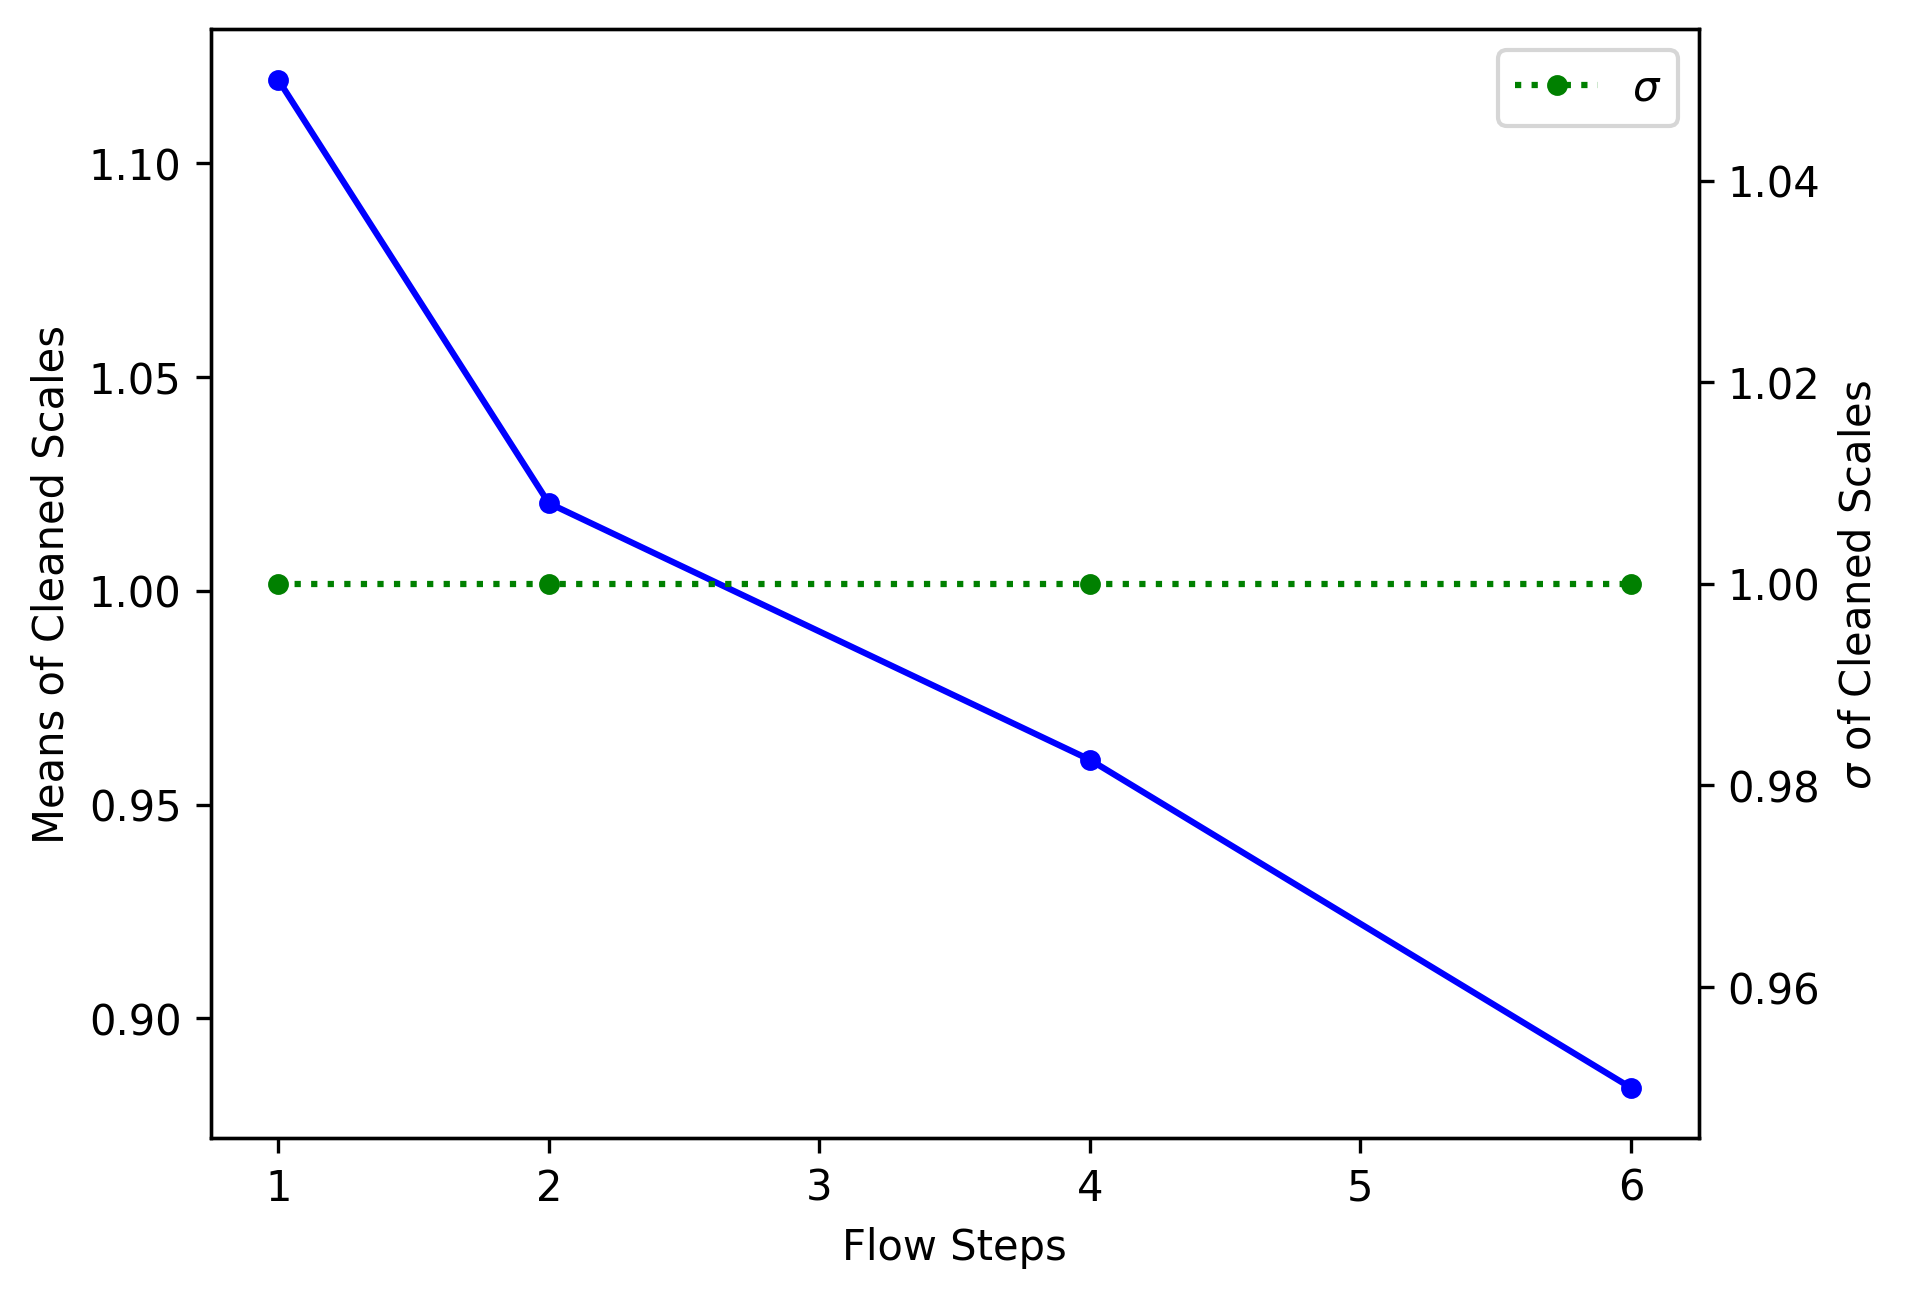

In [11]:
# Sample data
x = [1, 2, 4, 6]
means = [1.1195, 1.0205, 0.9605, 0.8838]  # Data for the left axis
stds = [1,1,1,1]  # Data for the right axis

# Create figure and primary axis
fig, ax1 = plt.subplots()

# Plot data on the primary axis
ax1.plot(x, means, 'b-o', label="Means",  markersize=4)  # blue solid line
ax1.set_xlabel('Flow Steps')
ax1.set_ylabel('Means of Cleaned Scales')

# Create secondary axis
ax2 = ax1.twinx()

# Plot data on the secondary axis
ax2.plot(x, stds, 'g:o', label="$\sigma$", markersize=4)  # green dashed line
ax2.set_ylabel('$\sigma$ of Cleaned Scales ')

# Show the plot
plt.legend()
plt.show()

## 3DGS plots from csv
Useful for downloading csv data from tensorboard and getting matplotlib plots from'em

In [2]:
def parse_csvs(paths, labels):
    results = {}
    for p, label in zip(paths, labels):
        with open(p, newline="") as csvfile:
            reader = csv.reader(csvfile, delimiter=",")
            next(reader, None) # skips the header
            x = []
            y = []
            for row in reader:
                if not row or not any(row):
                    continue
                _, iteration, value = row
                x.append(float(iteration))
                y.append(float(value))
            results[label] = (x, y)
    return results

In [ ]:
# visual quality plots
paths_to_psnr = []
paths_to_l1 = []
paths_to_ssim = []
labels = []

# eval_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots")
# paths_to_psnr.append(eval_dir / "1_colmap_baseline_psnr.csv")
# paths_to_l1.append(eval_dir / "1_colmap_baseline_l1.csv")
# paths_to_ssim.append(eval_dir / "1_colmap_baseline_ssim.csv")
# labels.append("COLMAP Baseline (no mask)")

# paths_to_psnr.append(eval_dir / "2_colmap_dense_psnr.csv")
# paths_to_l1.append(eval_dir / "2_colmap_dense_l1.csv")
# paths_to_ssim.append(eval_dir / "2_colmap_dense_ssim.csv")
# labels.append("COLMAP Dense No Masking")

eval_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/quality")
paths_to_psnr.append(eval_dir / "6_colmap_baseline_masked_psnr.csv")
paths_to_l1.append(eval_dir / "6_colmap_baseline_masked_l1.csv")
paths_to_ssim.append(eval_dir / "6_colmap_baseline_masked_ssim.csv")
labels.append("COLMAP Baseline")

paths_to_psnr.append(eval_dir / "3_colmap_dense_masked_psnr.csv")
paths_to_l1.append(eval_dir / "3_colmap_dense_masked_l1.csv")
paths_to_ssim.append(eval_dir / "3_colmap_dense_masked_ssim.csv")
labels.append("COLMAP Dense")

paths_to_psnr.append(eval_dir / "4_colmap_dense_masked_with_init_psnr.csv")
paths_to_l1.append(eval_dir / "4_colmap_dense_masked_with_init_l1.csv")
paths_to_ssim.append(eval_dir / "4_colmap_dense_masked_with_init_ssim.csv")
labels.append("COLMAP Dense + Init")

paths_to_psnr.append(eval_dir / "11_colmap_dense_masked_with_skydome_psnr.csv")
paths_to_l1.append(eval_dir / "11_colmap_dense_masked_with_skydome_l1.csv")
paths_to_ssim.append(eval_dir / "11_colmap_dense_masked_with_skydome_ssim.csv")
labels.append("COLMAP Dense + Skydome")

paths_to_psnr.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_psnr.csv")
paths_to_l1.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_l1.csv")
paths_to_ssim.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_ssim.csv")
labels.append("COLMAP Dense + Init + Skydome")

paths_to_psnr.append(eval_dir / "5_orb_rgbd_with_skydome_psnr.csv")
paths_to_l1.append(eval_dir / "5_orb_rgbd_with_skydome_l1.csv")
paths_to_ssim.append(eval_dir / "5_orb_rgbd_with_skydome_ssim.csv")
labels.append("RGB-D Dense + Skydome")

fig = plt.figure(figsize=(18,6))

# psnr
ax1 = fig.add_subplot(1,3,1)
results_psnr = parse_csvs(paths_to_psnr, labels)
for label, (x, y) in results_psnr.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("PSNR")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

# ssim
ax1 = fig.add_subplot(1,3,2)
results_ssim = parse_csvs(paths_to_ssim, labels)
for label, (x, y) in results_ssim.items():
    ax1.plot(x, y, label=label)
ax1.set_title("SSIM")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("SSIM")
ax1.grid()

# l1
ax3 = fig.add_subplot(1,3,3)
results_l1 = parse_csvs(paths_to_l1, labels)
for label, (x, y) in results_l1.items():
    ax3.plot(x, y, label=label)
# ax3.legend()
ax3.set_title("L1")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("L1 Loss")
ax3.grid()

plt.show()

In [ ]:
# voxel size ablation plots
csv_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/voxel")

paths_to_psnr = [
    csv_dir / "9_colmap_voxel_0_01_psnr.csv",
    csv_dir / "1_colmap_voxel_0_1_psnr.csv",
    csv_dir / "12_colmap_voxel_1_psnr.csv",
]
paths_to_num_points = [
    csv_dir / "9_colmap_voxel_0_01_total_points.csv",
    csv_dir / "1_colmap_voxel_0_1_total_points.csv",
    csv_dir / "12_colmap_voxel_1_total_points.csv",
]

labels = ["Voxel Size: 0.01", "Voxel Size: 0.1", "Voxel Size: 1.0"]

results_psnr = parse_csvs(paths_to_psnr, labels)
results_points = parse_csvs(paths_to_num_points, labels)


# psnr plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
results_psnr = parse_csvs(paths_to_psnr, labels)
for label, (x, y) in results_psnr.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("PSNR")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

fig1.show()

# num points plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
results_points = parse_csvs(paths_to_num_points, labels)
for label, (x, y) in results_points.items():
    ax2.plot(x, y, label=label)
ax2.legend()
ax2.set_title("Number of Points")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Num. Points")
ax2.grid()
plt.minorticks_on()

fig2.show()


In [ ]:
# depth reg, ds01, colmap pose, best performing config
eval_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/reg")
paths_to_psnr = []
paths_to_l1 = []
paths_to_ssim = []
labels = []

paths_to_psnr.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_psnr.csv")
paths_to_l1.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_l1.csv")
paths_to_ssim.append(eval_dir / "5_colmap_dense_masked_with_init_and_skydome_ssim.csv")
labels.append("No Reg.")

paths_to_psnr.append(eval_dir / "8_colmap_dense_masked_with_init_and_skydome_depth_reg_psnr.csv")
paths_to_l1.append(eval_dir / "8_colmap_dense_masked_with_init_and_skydome_depth_reg_l1.csv")
paths_to_ssim.append(eval_dir / "8_colmap_dense_masked_with_init_and_skydome_depth_reg_ssim.csv")
labels.append("Depth Reg.")

paths_to_psnr.append(eval_dir / "3_colmap_dense_masked_with_init_and_skydome_n_reg_psnr.csv")
paths_to_l1.append(eval_dir / "3_colmap_dense_masked_with_init_and_skydome_n_reg_l1.csv")
paths_to_ssim.append(eval_dir / "3_colmap_dense_masked_with_init_and_skydome_n_reg_ssim.csv")
labels.append("Normal Reg.")

paths_to_psnr.append(eval_dir / "6_colmap_dense_masked_with_init_and_skydome_dn_reg_psnr.csv")
paths_to_l1.append(eval_dir / "6_colmap_dense_masked_with_init_and_skydome_dn_reg_l1.csv")
paths_to_ssim.append(eval_dir / "6_colmap_dense_masked_with_init_and_skydome_dn_reg_ssim.csv")
labels.append("Depth + Normal Reg.")


fig = plt.figure(figsize=(18,6))

# psnr
ax1 = fig.add_subplot(1,3,1)
results_psnr = parse_csvs(paths_to_psnr, labels)
for label, (x, y) in results_psnr.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("PSNR")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

# ssim
ax1 = fig.add_subplot(1,3,2)
results_ssim = parse_csvs(paths_to_ssim, labels)
for label, (x, y) in results_ssim.items():
    ax1.plot(x, y, label=label)
ax1.set_title("SSIM")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("SSIM")
ax1.grid()

# l1
ax3 = fig.add_subplot(1,3,3)
results_l1 = parse_csvs(paths_to_l1, labels)
for label, (x, y) in results_l1.items():
    ax3.plot(x, y, label=label)
# ax3.legend()
ax3.set_title("L1")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("L1 Loss")
ax3.grid()

plt.show()

In [ ]:
# depth reg, ds01, orb rgbd pose
eval_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/reg")
paths_to_psnr = []
paths_to_l1 = []
paths_to_ssim = []
labels = []

paths_to_psnr.append(eval_dir / "21_orb_rgbd_psnr.csv")
labels.append("No Reg.")

paths_to_psnr.append(eval_dir / "11_orb_rgbd_d_reg_psnr.csv")
labels.append("Depth Reg.")

paths_to_psnr.append(eval_dir / "14_orb_rgbd_n_reg_psnr.csv")
labels.append("Normal Reg.")

paths_to_psnr.append(eval_dir / "17_orb_rgbd_dn_reg_psnr.csv")
labels.append("Depth + Normal Reg.")


fig = plt.figure(figsize=(9,6))

# psnr
ax1 = fig.add_subplot(1,1,1)
results_psnr = parse_csvs(paths_to_psnr, labels)
for label, (x, y) in results_psnr.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("PSNR")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

# # ssim
# ax2 = fig.add_subplot(1,3,2)
# results_ssim = parse_csvs(paths_to_ssim, labels)
# for label, (x, y) in results_ssim.items():
#     ax2.plot(x, y, label=label)
# ax2.set_title("SSIM")
# ax2.set_xlabel("Iterations")
# ax2.set_ylabel("SSIM")
# ax2.grid()

# # l1
# ax3 = fig.add_subplot(1,3,3)
# results_l1 = parse_csvs(paths_to_l1, labels)
# for label, (x, y) in results_l1.items():
#     ax3.plot(x, y, label=label)
# # ax3.legend()
# ax3.set_title("L1")
# ax3.set_xlabel("Iterations")
# ax3.set_ylabel("L1 Loss")
# ax3.grid()

plt.show()

In [ ]:
# view sparsity ablation plots
csv_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/view")
paths_to_psnr = []
paths_to_psnr_train = []
labels = []

paths_to_psnr.append(csv_dir / "1_colmap_view_sparsity_block_16_no_reg.csv")
labels.append("Test Window Size: 16")

paths_to_psnr.append(csv_dir / "14_colmap_view_sparsity_block_8_no_reg.csv")
labels.append("Test Window Size: 8")

paths_to_psnr.append(csv_dir / "15_colmap_view_sparsity_block_4_no_reg.csv")
labels.append("Test Window Size: 4")

paths_to_psnr.append(csv_dir / "16_colmap_view_sparsity_block_1_no_reg.csv")
labels.append("Test Window Size: 1")

paths_to_psnr_train.append(csv_dir / "1_colmap_view_sparsity_block_16_no_reg_train.csv")
paths_to_psnr_train.append(csv_dir / "14_colmap_view_sparsity_block_8_no_reg_train.csv")
paths_to_psnr_train.append(csv_dir / "15_colmap_view_sparsity_block_4_no_reg_train.csv")
paths_to_psnr_train.append(csv_dir / "16_colmap_view_sparsity_block_1_no_reg_train.csv")

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)

results_psnr = parse_csvs(paths_to_psnr, labels)
for label, (x, y) in results_psnr.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("Test PSNR")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

psnr_results_train = parse_csvs(paths_to_psnr_train, labels)
ax2 = fig.add_subplot(122)
for label, (x, y) in psnr_results_train.items():
    ax2.plot(x, y, label=label)
ax2.set_title("Train PSNR")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("PSNR")
ax2.grid()

In [ ]:
# view sparsity influence of d-reg
csv_dir = Path("/usr/stud/kaa/thesis/DEN-Splatting/evaluation/gaussian_splatting_plots/view")
labels = ["No Reg.", "Depth Reg.", "Normal Reg.", "Depth + Normal Reg."]

paths_to_block1 = [
    csv_dir / "16_colmap_view_sparsity_block_1_no_reg.csv",
    csv_dir / "18_colmap_view_sparsity_block_1_d_reg.csv",
    csv_dir / "5_colmap_view_sparsity_block_1_dn_reg_psnr.csv",
    csv_dir / "7_colmap_view_sparsity_block_1_n_reg_psnr.csv",
]

paths_to_block4 = [
    csv_dir / "15_colmap_view_sparsity_block_4_no_reg.csv",
    csv_dir / "21_colmap_view_sparsity_block_4_d_reg.csv",
    csv_dir / "10_colmap_view_sparsity_block_4_n_reg_psnr.csv",
    csv_dir / "1_colmap_view_sparsity_block_4_dn_reg_psnr.csv",
]

paths_to_block8 = [
    csv_dir / "14_colmap_view_sparsity_block_8_no_reg.csv",
    csv_dir / "20_colmap_view_sparsity_block_8_d_reg.csv",
    csv_dir / "8_colmap_view_sparsity_block_8_n_reg_psnr.csv",
    csv_dir / "3_colmap_view_sparsity_block_8_dn_reg_psnr.csv",
]

paths_to_block16 = [
    csv_dir / "1_colmap_view_sparsity_block_16_no_reg.csv",
    csv_dir / "2_colmap_view_sparsity_block_16_d_reg.csv",
    csv_dir / "9_colmap_view_sparsity_block_16_n_reg_psnr.csv",
    csv_dir / "3_colmap_view_sparsity_block_16_dn_reg_psnr.csv",
]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)

results_psnr_block1 = parse_csvs(paths_to_block1, labels)
for label, (x, y) in results_psnr_block1.items():
    ax1.plot(x, y, label=label)
ax1.legend()
ax1.set_title("Window Size: 1")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("PSNR")
ax1.grid()

psnr_results_block4 = parse_csvs(paths_to_block4, labels)
ax2 = fig.add_subplot(222)
for label, (x, y) in psnr_results_block4.items():
    ax2.plot(x, y, label=label)
ax2.set_title("Window Size: 4")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("PSNR")
# ax2.legend()
ax2.grid()

psnr_results_block8 = parse_csvs(paths_to_block8, labels)
ax3 = fig.add_subplot(223)
for label, (x, y) in psnr_results_block8.items():
    ax3.plot(x, y, label=label)
ax3.set_title("Window Size: 8")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("PSNR")
# ax3.legend()
ax3.grid()

psnr_results_block16 = parse_csvs(paths_to_block16, labels)
ax4 = fig.add_subplot(224)
for label, (x, y) in psnr_results_block16.items():
    ax4.plot(x, y, label=label)
ax4.set_title("Window Size: 16")
ax4.set_xlabel("Iterations")
ax4.set_ylabel("PSNR")
# ax4.legend()
ax4.grid()

plt.show()

## Point cloud renderings from perturbed views using open3d (not used, using CloudCompare)
Useful for getting consistent images of dense point cloud reconstructions (Can also just use CloudCompare and the 'render to file' option)

In [ ]:
from pathlib import Path

import torch
import open3d as o3d

from modules.core.utils import format_intrinsics
from modules.io.utils import read_ply, read_ply_o3d, save_image_torch
from modules.io.datasets import ColmapDataset, KITTI360Dataset, CustomDataset
from modules.scale_alignment.sparse import project_pcd_o3d


In [ ]:
root_dir = Path("/usr/stud/kaa/data/root/kitti360_0_mini")
ply_path = Path("/usr/stud/kaa/data/root/kitti360_0_mini/reconstructions/4_colmap_sparse_scale/cloud.ply")
pose_scale = 41.6
colmap_dir = root_dir / "poses" / "colmap"
image_dir = root_dir / "data" / "rgb"
output_dir = Path("./pcd_projections")
pose_ids = [500, 800]
seq_id = 0
cam_id = 0
# pose_path = Path("")
pose_path = None
depth_max = 30
target_size = ()
padded_img_name_length = 10
dataset_type = "colmap" # kitti360, colmap, or custom
intrinsics = [552.55, 552.55, 682.05, 238.77] # [fx, fy, cx, cy]

# pose rotation
angle = 15
radian = angle * torch.pi / 180
R = torch.tensor([[torch.cos(radian), -torch.sin(radian), 0.0],
                    [torch.sin(radian),  torch.cos(radian), 0.0],
                    [0.0,                0.0,               1.0]])
#TODO figure out what we have to add here to disturb the view



if dataset_type == "kitti360":
    dataset = KITTI360Dataset(seq_id, cam_id, pose_scale, target_size)
    pose_path = dataset.pose_path # GT poses
elif dataset_type == "colmap":
    dataset = ColmapDataset(
    colmap_dir,
    pose_scale=pose_scale,
    target_size=target_size,
    orig_intrinsics=intrinsics,
    padded_img_name_length=padded_img_name_length,
    )
    if pose_path is not None:
        dataset.pose_path = pose_path
elif dataset_type == "custom":
    dataset = CustomDataset(
        image_dir,
        pose_path,
        pose_scale=pose_scale,
        target_size=target_size,
        orig_intrinsics=intrinsics,
        padded_img_name_length=padded_img_name_length,
        )

H, W = dataset.H, dataset.W

if ply_path.name == "points3D.txt":
    pcd = ColmapDataset.read_colmap_pcd_o3d(ply_path, convert_to_float32=True)
else:
    pcd = read_ply_o3d(ply_path, convert_to_float32=True)

_, _, poses = dataset.get_by_frame_ids(pose_ids)
K = format_intrinsics(intrinsics) # [3, 3]

images = []
for pose in poses:
    pose_inv = torch.linalg.inv(pose)

    rgb = project_pcd_o3d(
        pcd,
        W,
        H,
        K,
        pose_inv,
        depth_max,
        get_rgb=True,
        )

    images.append(rgb)

for i, image in enumerate(images):
    save_image_torch(image, f"projection_{i}", output_dir=output_dir)

print("Done!")
